In [163]:
from IPython.core.display import display, HTML
display(HTML("<style>.jp-OutputArea{max-height: 1000px !important;}</style>"))


C:\Users\b6nda\AppData\Local\Temp\ipykernel_29484\4258344448.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv(r"C:\Users\b6nda\Downloads\TCPD_AE_Tamil_Nadu_2025-11-24.csv\Tamil_Nadu_AE.csv")

C:\Users\b6nda\AppData\Local\Temp\ipykernel_29484\2504301832.py:1: DtypeWarning: Columns (13,18,19,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\b6nda\Downloads\TCPD_AE_Tamil_Nadu_2025-11-24.csv\Tamil_Nadu_AE.csv")


In [9]:
df.columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'DelimID', 'Poll_No', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Age', 'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'District_Name', 'Sub_Region', 'N_Cand',
       'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin',
       'Margin_Percentage', 'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID',
       'last_poll', 'Contested', 'Last_Party', 'Last_Party_ID',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'MyNeta_education',
       'TCPD_Prof_Main', 'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second',
       'TCPD_Prof_Second_Desc', 'Election_Type'],
      dtype='object')

In [13]:
df.head()

,State_Name,Assembly_No,Constituency_No,Year,month,DelimID,Poll_No,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Tamil_Nadu,12,1,2021,5.0,4,0,1,GOVINDARAJAN T.J,M,...,1.0,False,False,False,10th Pass,Business,NaN,NaN,NaN,State Assembly Election (AE)
1,Tamil_Nadu,12,1,2021,5.0,4,0,2,PRAKASH M,M,...,0.0,False,False,False,10th Pass,Salaried Work or Employed,Qualified Professional,NaN,NaN,State Assembly Election (AE)
2,Tamil_Nadu,12,1,2021,5.0,4,0,3,USHA,F,...,0.0,False,False,False,8th Pass,Agriculture,NaN,NaN,NaN,State Assembly Election (AE)
3,Tamil_Nadu,12,1,2021,5.0,4,0,4,DILLIY K.M,M,...,0.0,False,False,False,8th Pass,Other,NaN,NaN,NaN,State Assembly Election (AE)
4,Tamil_Nadu,12,1,2021,5.0,4,0,5,None Of The Above,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,State Assembly Election (AE)


In [137]:
cols = [
    'Year',
    'District_Name',
    'Constituency_No',
    'Constituency_Name',
    'Constituency_Type',
    'Candidate',
    'Sex',
    'Party',
    'Votes',
    'Valid_Votes',
    'Electors',
    'Turnout_Percentage',
    'Vote_Share_Percentage',
    'Margin',
    'Margin_Percentage'
]

df_inf = df[cols].copy()
ae_years = [1971, 1977, 1980, 1984, 1989, 1991, 1996, 
            2001, 2006, 2011, 2016, 2021]

df_inf = df_inf[df_inf['Year'].isin(ae_years)]


In [138]:
df_inf.head()

,Year,District_Name,Constituency_No,Constituency_Name,Constituency_Type,Candidate,Sex,Party,Votes,Valid_Votes,Electors,Turnout_Percentage,Vote_Share_Percentage,Margin,Margin_Percentage
0,2021,TIRUVALLUR,1,GUMMIDIPUNDI,GEN,GOVINDARAJAN T.J,M,DMK,126452,222069,284412,78.08,56.94,50938,22.94
1,2021,TIRUVALLUR,1,GUMMIDIPUNDI,GEN,PRAKASH M,M,PMK,75514,222069,284412,78.08,34.00,63813,28.74
2,2021,TIRUVALLUR,1,GUMMIDIPUNDI,GEN,USHA,F,NTK,11701,222069,284412,78.08,5.27,9125,4.11
3,2021,TIRUVALLUR,1,GUMMIDIPUNDI,GEN,DILLIY K.M,M,DMDK,2576,222069,284412,78.08,1.16,793,0.36
4,2021,TIRUVALLUR,1,GUMMIDIPUNDI,GEN,None Of The Above,NaN,NOTA,1783,222069,284412,78.08,0.80,745,0.34


In [141]:
df_inf.shape

(29693, 15)

In [142]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29693 entries, 0 to 30727
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   29693 non-null  int64  
 1   District_Name          10984 non-null  object 
 2   Constituency_No        29693 non-null  int64  
 3   Constituency_Name      29693 non-null  object 
 4   Constituency_Type      29693 non-null  object 
 5   Candidate              29693 non-null  object 
 6   Sex                    29103 non-null  object 
 7   Party                  29693 non-null  object 
 8   Votes                  29693 non-null  int64  
 9   Valid_Votes            29693 non-null  int64  
 10  Electors               29693 non-null  int64  
 11  Turnout_Percentage     29693 non-null  float64
 12  Vote_Share_Percentage  29693 non-null  float64
 13  Margin                 29693 non-null  int64  
 14  Margin_Percentage      29693 non-null  float64
dtypes: floa

In [143]:
df_inf.describe()

,Year,Constituency_No,Votes,Valid_Votes,Electors,Turnout_Percentage,Vote_Share_Percentage,Margin,Margin_Percentage
count,29693.000000,29693.000000,29693.000000,29693.000000,29693.000000,29693.000000,29693.000000,29693.000000,29693.000000
mean,2000.992422,114.537972,11380.416832,137113.438622,199000.764288,68.658999,9.497195,5461.131075,4.500992
std,14.336628,69.101949,22317.800233,51917.697253,73505.334147,8.718170,17.126910,12905.243407,9.819719
min,1971.000000,1.000000,2.000000,36467.000000,78419.000000,30.130000,0.000000,0.000000,0.000000
25%,1989.000000,54.000000,169.000000,98530.000000,151882.000000,62.620000,0.120000,10.000000,0.010000
50%,2001.000000,115.000000,616.000000,125499.000000,186856.000000,68.420000,0.460000,100.000000,0.070000
75%,2016.000000,174.000000,9125.000000,173388.000000,236517.000000,75.170000,7.440000,2824.000000,2.430000
max,2021.000000,234.000000,278850.000000,611084.000000,941112.000000,97.870000,96.570000,196842.000000,95.520000


In [144]:
df_inf.isnull().sum()

Year                         0
District_Name            18709
Constituency_No              0
Constituency_Name            0
Constituency_Type            0
Candidate                    0
Sex                        590
Party                        0
Votes                        0
Valid_Votes                  0
Electors                     0
Turnout_Percentage           0
Vote_Share_Percentage        0
Margin                       0
Margin_Percentage            0
dtype: int64

<Axes: >

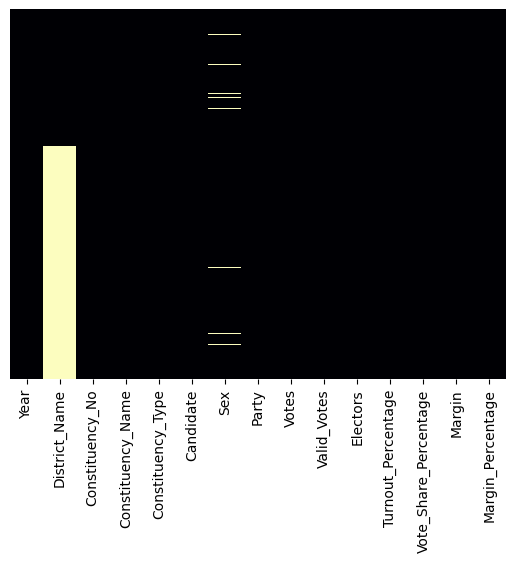

In [145]:
sns.heatmap(
    df_inf.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='magma',

    
)

In [146]:
const_to_dist=df_inf[['Constituency_No','District_Name']].dropna().drop_duplicates().set_index('Constituency_No')['District_Name'].to_dict()
df_inf['District_Name']=df_inf['Constituency_No'].map(const_to_dist)

In [147]:
df_inf['Sex']=df_inf['Sex'].fillna('Unknown')

<Axes: >

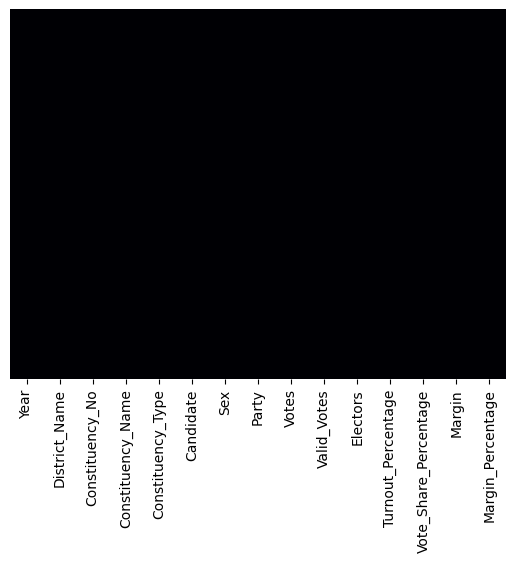

In [148]:
sns.heatmap(
    df_inf.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='magma'
)


In [160]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29693 entries, 0 to 30727
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   29693 non-null  int64  
 1   District_Name          29693 non-null  object 
 2   Constituency_No        29693 non-null  int64  
 3   Constituency_Name      29693 non-null  object 
 4   Constituency_Type      29693 non-null  object 
 5   Candidate              29693 non-null  object 
 6   Sex                    29693 non-null  object 
 7   Party                  29693 non-null  object 
 8   Votes                  29693 non-null  int64  
 9   Valid_Votes            29693 non-null  int64  
 10  Electors               29693 non-null  int64  
 11  Turnout_Percentage     29693 non-null  float64
 12  Vote_Share_Percentage  29693 non-null  float64
 13  Margin                 29693 non-null  int64  
 14  Margin_Percentage      29693 non-null  float64
dtypes: floa

In [166]:
df_inf['Turnout_Percentage'].describe()


count    29693.000000
mean        68.658999
std          8.718170
min         30.130000
25%         62.620000
50%         68.420000
75%         75.170000
max         97.870000
Name: Turnout_Percentage, dtype: float64

In [167]:
df_inf.groupby(['Year','Constituency_No'])['Vote_Share_Percentage'].sum().describe()


count    2806.000000
mean      100.499009
std         7.047370
min        99.960000
25%        99.990000
50%       100.000000
75%       100.010000
max       200.050000
Name: Vote_Share_Percentage, dtype: float64

In [176]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine

# Your PostgreSQL connection details
user = "postgres"
password = "1947"
host = "localhost"
port = "5432"
database = "TN_ASSEMBLY"

# SQLAlchemy connection string
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")

df_inf.to_sql('tn_election',engine,if_exists='replace',index=False)

693